#### 4-1 割引クーポンキャンペーンの効果最大化

1. 各会員にどのパターンのダイレクトメールを送付するか
2. 各会員に対し送付するパターンは1つ
3. クーポン付与により来客増加数を最大化
4. 予算100万円以下
5. それぞれのセグメント会員の10%に送付

In [20]:
from pulp import LpProblem, LpVariable, LpMaximize, LpStatus, lpSum, value
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import math
import seaborn as sns
import time

In [21]:
files = glob('../*/*coupon/*.csv')
cust_df = pd.read_csv(files[0])
prob_df = pd.read_csv(files[1])

In [22]:
cust_df.info()
cust_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  5000 non-null   int64 
 1   age_cat      5000 non-null   object
 2   freq_cat     5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


customer_id   age_cat freq_cat
0            1  age20~34    freq2
1            2  age35~49    freq0
2            3  age35~49    freq0
3            4    age~19    freq0
4            5  age35~49    freq0

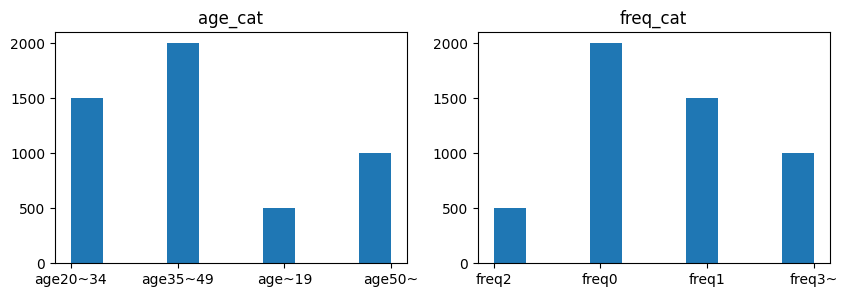

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].hist(cust_df['age_cat'])
axs[0].set_title('age_cat')
axs[1].hist(cust_df['freq_cat'])
axs[1].set_title('freq_cat')
plt.show()

<Axes: xlabel='freq_cat', ylabel='age_cat'>

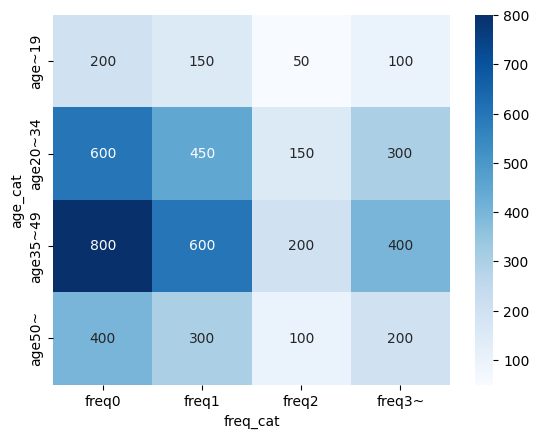

In [24]:
pivot_df = pd.pivot_table(data=cust_df, values='customer_id', columns='freq_cat', index='age_cat', aggfunc='count')
pivot_df = pivot_df.reindex(['age~19', 'age20~34', 'age35~49', 'age50~'])
pivot_df
sns.heatmap(pivot_df, annot=True, fmt='d', cmap='Blues')

In [25]:
prob_df

age_cat freq_cat  segment_id  prob_dm1  prob_dm2  prob_dm3
0     age~19    freq0           1      0.07      0.12      0.29
1     age~19    freq1           2      0.21      0.30      0.58
2     age~19    freq2           3      0.28      0.39      0.74
3     age~19   freq3~           4      0.35      0.45      0.77
4   age20~34    freq0           5      0.11      0.17      0.37
5   age20~34    freq1           6      0.32      0.43      0.72
6   age20~34    freq2           7      0.42      0.55      0.93
7   age20~34   freq3~           8      0.52      0.63      0.94
8   age35~49    freq0           9      0.08      0.14      0.33
9   age35~49    freq1          10      0.25      0.35      0.67
10  age35~49    freq2          11      0.34      0.45      0.86
11  age35~49   freq3~          12      0.42      0.52      0.89
12    age50~    freq0          13      0.07      0.13      0.32
13    age50~    freq1          14      0.21      0.33      0.65
14    age50~    freq2          15      0.28      0.42      0.84
15    age50~   freq3~          16      0.35      0.49      0.88

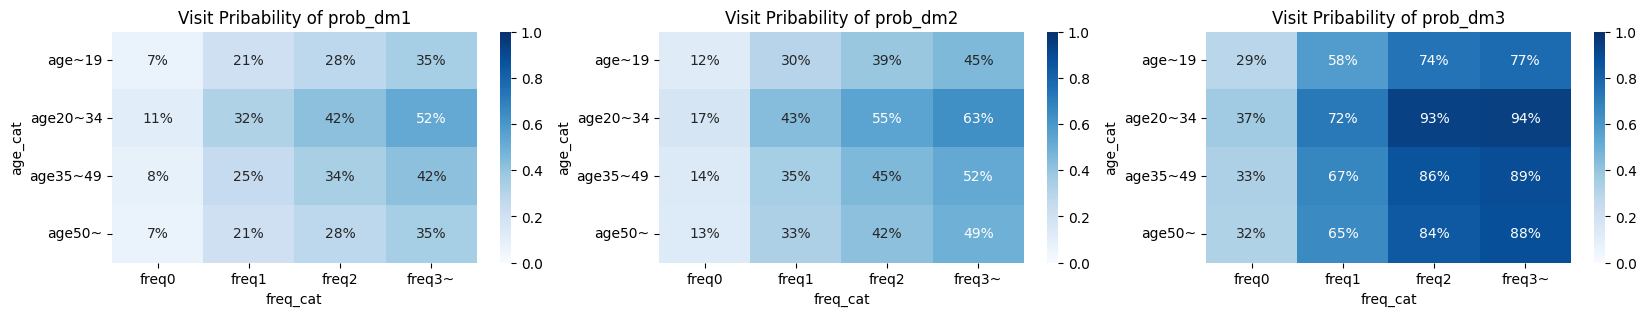

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(20, 3))
for i, ptn in enumerate(['prob_dm1', 'prob_dm2', 'prob_dm3']):
    prob_pivot_df = pd.pivot_table(data=prob_df, values=ptn, columns='freq_cat', index='age_cat')
    prob_pivot_df = prob_pivot_df.reindex(['age~19', 'age20~34', 'age35~49', 'age50~'])
    sns.heatmap(prob_pivot_df, vmin=0, vmax=1, annot=True, fmt='.0%', cmap='Blues', ax=axs[i])
    axs[i].set_title(f'Visit Pribability of {ptn}')
plt.show()

数理モデル定義

In [27]:
problem = LpProblem(name='DiscountCouponProblem01', sense=LpMaximize)

変数定義

In [28]:
I = cust_df['customer_id'].to_list()
M = [i+1 for i in range(3)]

xim = {}
for i in I:
    for m in M:
        xim[i, m] = LpVariable(name=f'xim({i},{m})', cat='Binary')
len(xim)

15000

条件定義: 割りあては必ず一つ
$$ \sum_{m\in M} x_{im} = 1 $$

In [29]:
for i in I:
    problem += lpSum(xim[i, m] for m in M) == 1
problem

DiscountCouponProblem01:
MAXIMIZE
None
SUBJECT TO
_C1: xim(1,1) + xim(1,2) + xim(1,3) = 1

_C2: xim(2,1) + xim(2,2) + xim(2,3) = 1

_C3: xim(3,1) + xim(3,2) + xim(3,3) = 1

_C4: xim(4,1) + xim(4,2) + xim(4,3) = 1

_C5: xim(5,1) + xim(5,2) + xim(5,3) = 1

_C6: xim(6,1) + xim(6,2) + xim(6,3) = 1

_C7: xim(7,1) + xim(7,2) + xim(7,3) = 1

_C8: xim(8,1) + xim(8,2) + xim(8,3) = 1

_C9: xim(9,1) + xim(9,2) + xim(9,3) = 1

_C10: xim(10,1) + xim(10,2) + xim(10,3) = 1

_C11: xim(11,1) + xim(11,2) + xim(11,3) = 1

_C12: xim(12,1) + xim(12,2) + xim(12,3) = 1

_C13: xim(13,1) + xim(13,2) + xim(13,3) = 1

_C14: xim(14,1) + xim(14,2) + xim(14,3) = 1

_C15: xim(15,1) + xim(15,2) + xim(15,3) = 1

_C16: xim(16,1) + xim(16,2) + xim(16,3) = 1

_C17: xim(17,1) + xim(17,2) + xim(17,3) = 1

_C18: xim(18,1) + xim(18,2) + xim(18,3) = 1

_C19: xim(19,1) + xim(19,2) + xim(19,3) = 1

_C20: xim(20,1) + xim(20,2) + xim(20,3) = 1

_C21: xim(21,1) + xim(21,2) + xim(21,3) = 1

_C22: xim(22,1) + xim(22,2) + xim(22,3) =

条件定義 : 来客増加数最大化
$$
Maxmize : \sum_{m\in M} (P_{im} - P_{i1}) x_{im}
$$

In [30]:
# display(prob_df)
# display(cust_df.head())

keys = cust_df.columns[1:].to_list()
cust_prob_df = pd.merge(cust_df, prob_df, on=keys)
cust_prob_df.head()

cust_prob_var_df = cust_prob_df.rename(columns={'prob_dm1':1, 'prob_dm2':2, 'prob_dm3':3})
cust_prob_var_df = cust_prob_var_df.melt(id_vars=['customer_id'], value_vars=[1, 2, 3], var_name='dm', value_name='prob')
cust_prob_var_df.head()

pim = cust_prob_var_df.set_index(['customer_id', 'dm'])['prob'].to_dict()
print(pim[1, 1])

problem += lpSum((pim[i, m] - pim[i, 1]) * xim[i, m] for i in I for m in [2, 3])

problem

0.42


DiscountCouponProblem01:
MAXIMIZE
0.13000000000000006*xim(1,2) + 0.51*xim(1,3) + 0.10999999999999999*xim(10,2) + 0.39999999999999997*xim(10,3) + 0.06000000000000001*xim(100,2) + 0.26*xim(100,3) + 0.06*xim(1000,2) + 0.25*xim(1000,3) + 0.06*xim(1001,2) + 0.25*xim(1001,3) + 0.06000000000000001*xim(1002,2) + 0.25*xim(1002,3) + 0.10999999999999999*xim(1003,2) + 0.39999999999999997*xim(1003,3) + 0.06000000000000001*xim(1004,2) + 0.25*xim(1004,3) + 0.10999999999999999*xim(1005,2) + 0.39999999999999997*xim(1005,3) + 0.06000000000000001*xim(1006,2) + 0.25*xim(1006,3) + 0.06000000000000001*xim(1007,2) + 0.25*xim(1007,3) + 0.06000000000000001*xim(1008,2) + 0.25*xim(1008,3) + 0.06000000000000001*xim(1009,2) + 0.26*xim(1009,3) + 0.06000000000000001*xim(101,2) + 0.26*xim(101,3) + 0.09999999999999998*xim(1010,2) + 0.42000000000000004*xim(1010,3) + 0.12000000000000002*xim(1011,2) + 0.44000000000000006*xim(1011,3) + 0.10000000000000003*xim(1012,2) + 0.47000000000000003*xim(1012,3) + 0.04999999999999999

条件定義 : 100万円以下
$$
C_m \in [0, 1000, 2000] , \quad
\sum_{i\in I}\sum_{m\in M} C_m P_{im} x_{im} \le 1000000
$$

In [31]:
cm = {1: 0, 2: 1000, 3: 2000}
problem += lpSum(cm[m] * pim[i, m] * xim[i, m] for i in I for m in M) <= 1000000
problem

DiscountCouponProblem01:
MAXIMIZE
0.13000000000000006*xim(1,2) + 0.51*xim(1,3) + 0.10999999999999999*xim(10,2) + 0.39999999999999997*xim(10,3) + 0.06000000000000001*xim(100,2) + 0.26*xim(100,3) + 0.06*xim(1000,2) + 0.25*xim(1000,3) + 0.06*xim(1001,2) + 0.25*xim(1001,3) + 0.06000000000000001*xim(1002,2) + 0.25*xim(1002,3) + 0.10999999999999999*xim(1003,2) + 0.39999999999999997*xim(1003,3) + 0.06000000000000001*xim(1004,2) + 0.25*xim(1004,3) + 0.10999999999999999*xim(1005,2) + 0.39999999999999997*xim(1005,3) + 0.06000000000000001*xim(1006,2) + 0.25*xim(1006,3) + 0.06000000000000001*xim(1007,2) + 0.25*xim(1007,3) + 0.06000000000000001*xim(1008,2) + 0.25*xim(1008,3) + 0.06000000000000001*xim(1009,2) + 0.26*xim(1009,3) + 0.06000000000000001*xim(101,2) + 0.26*xim(101,3) + 0.09999999999999998*xim(1010,2) + 0.42000000000000004*xim(1010,3) + 0.12000000000000002*xim(1011,2) + 0.44000000000000006*xim(1011,3) + 0.10000000000000003*xim(1012,2) + 0.47000000000000003*xim(1012,3) + 0.04999999999999999

条件定義 : 会員の10%に送付
$$ $$

In [32]:
S = prob_df['segment_id'].to_list()
len(S)
ns = cust_prob_df.groupby('segment_id')['customer_id'].count().to_dict()
# print(ns)
si = cust_prob_df.set_index('customer_id')['segment_id'].to_dict()
si

for s in S:
    for m in M:
        problem += lpSum(xim[i, m] for i in I if si[i] == s) >= 0.1 * ns[s]

problem

DiscountCouponProblem01:
MAXIMIZE
0.13000000000000006*xim(1,2) + 0.51*xim(1,3) + 0.10999999999999999*xim(10,2) + 0.39999999999999997*xim(10,3) + 0.06000000000000001*xim(100,2) + 0.26*xim(100,3) + 0.06*xim(1000,2) + 0.25*xim(1000,3) + 0.06*xim(1001,2) + 0.25*xim(1001,3) + 0.06000000000000001*xim(1002,2) + 0.25*xim(1002,3) + 0.10999999999999999*xim(1003,2) + 0.39999999999999997*xim(1003,3) + 0.06000000000000001*xim(1004,2) + 0.25*xim(1004,3) + 0.10999999999999999*xim(1005,2) + 0.39999999999999997*xim(1005,3) + 0.06000000000000001*xim(1006,2) + 0.25*xim(1006,3) + 0.06000000000000001*xim(1007,2) + 0.25*xim(1007,3) + 0.06000000000000001*xim(1008,2) + 0.25*xim(1008,3) + 0.06000000000000001*xim(1009,2) + 0.26*xim(1009,3) + 0.06000000000000001*xim(101,2) + 0.26*xim(101,3) + 0.09999999999999998*xim(1010,2) + 0.42000000000000004*xim(1010,3) + 0.12000000000000002*xim(1011,2) + 0.44000000000000006*xim(1011,3) + 0.10000000000000003*xim(1012,2) + 0.47000000000000003*xim(1012,3) + 0.04999999999999999

In [33]:
time_start = time.time()
status = problem.solve()
time_stop = time.time()

print(f'Status : {LpStatus[status]}')
print(f'Result : {value(problem.objective):.04}')
print(f'Time : {time_stop - time_start:.03} (sec)')


Status : Optimal
Result : 326.1
Time : 6.62 (sec)


In [34]:
send_dm_df = pd.DataFrame(
    [[xim[i, m].value() for m in M] for i in I],
    columns=['send_dm1', 'send_dm2', 'send_dm3']
    )
display(send_dm_df.head())

cust_send_df = pd.concat([cust_df[['customer_id', 'age_cat', 'freq_cat']], send_dm_df], axis=1)
display(cust_send_df.head())

send_dm1  send_dm2  send_dm3
0       0.0       1.0       0.0
1       0.0       1.0       0.0
2       0.0       1.0       0.0
3       0.0       0.0       1.0
4       0.0       1.0       0.0

customer_id   age_cat freq_cat  send_dm1  send_dm2  send_dm3
0            1  age20~34    freq2       0.0       1.0       0.0
1            2  age35~49    freq0       0.0       1.0       0.0
2            3  age35~49    freq0       0.0       1.0       0.0
3            4    age~19    freq0       0.0       0.0       1.0
4            5  age35~49    freq0       0.0       1.0       0.0

freq_cat  freq0  freq1  freq2  freq3~
age_cat                              
age20~34    0.8    0.8    0.8     0.8
age35~49    0.1    0.8    0.8     0.8
age50~      0.1    0.8    0.8     0.8
age~19      0.1    0.8    0.8     0.8

freq_cat  freq0  freq1  freq2  freq3~
age_cat                              
age20~34  0.100    0.1    0.1     0.1
age35~49  0.800    0.1    0.1     0.1
age50~    0.280    0.1    0.1     0.1
age~19    0.795    0.1    0.1     0.1

freq_cat  freq0  freq1  freq2  freq3~
age_cat                              
age20~34  0.100    0.1    0.1     0.1
age35~49  0.100    0.1    0.1     0.1
age50~    0.620    0.1    0.1     0.1
age~19    0.105    0.1    0.1     0.1

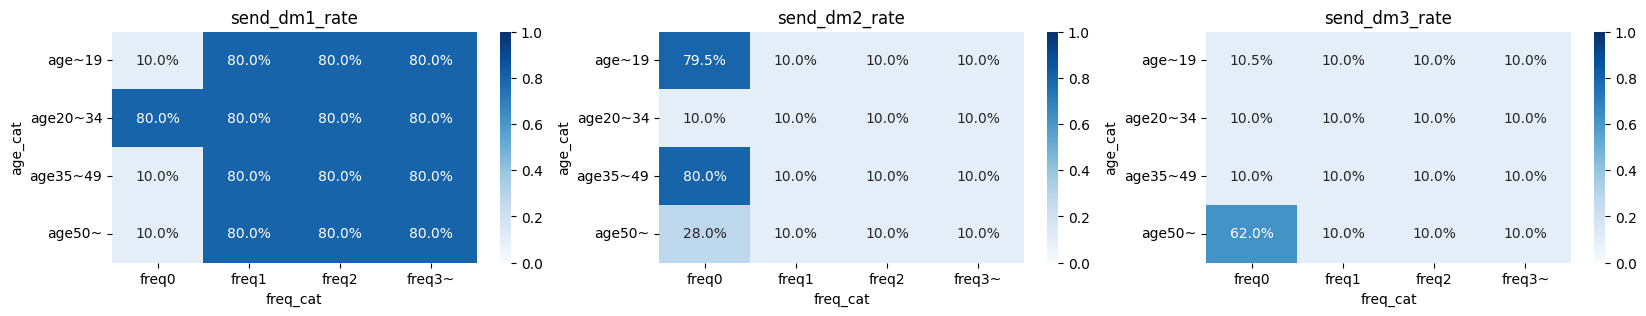

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(20, 3))
for i, ptn in enumerate(['send_dm1', 'send_dm2', 'send_dm3']):
    cust_send_pivot_df = pd.pivot_table(data=cust_send_df, values=ptn, columns='freq_cat', index='age_cat', aggfunc='mean')
    display(cust_send_pivot_df)
    cust_send_pivot_df = cust_send_pivot_df.reindex(['age~19', 'age20~34', 'age35~49', 'age50~'])
    sns.heatmap(cust_send_pivot_df, vmin=0, vmax=1, annot=True, fmt='.1%', cmap='Blues', ax=axs[i])
    axs[i].set_title(f'{ptn}_rate')
plt.show()

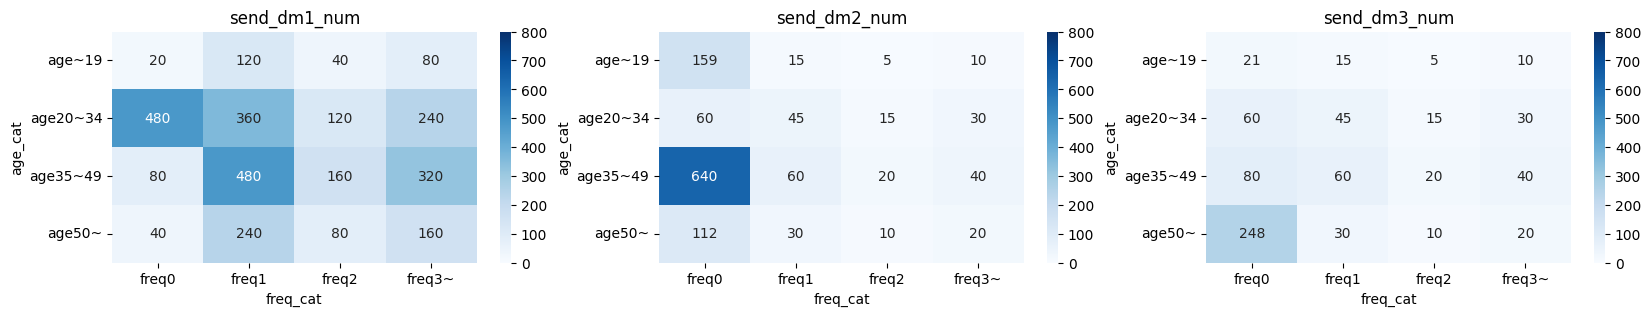

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(20, 3))
for i, ptn in enumerate(['send_dm1', 'send_dm2', 'send_dm3']):
    cust_send_pivot_df = pd.pivot_table(data=cust_send_df, values=ptn, columns='freq_cat', index='age_cat', aggfunc='sum')
    cust_send_pivot_df = cust_send_pivot_df.reindex(['age~19', 'age20~34', 'age35~49', 'age50~'])
    sns.heatmap(cust_send_pivot_df, vmin=0, vmax=800, annot=True, fmt='.0f', cmap='Blues', ax=axs[i])
    axs[i].set_title(f'{ptn}_num')
plt.show()

In [45]:
problem = LpProblem(name='DiscountCouponProblem02', sense=LpMaximize)

xsm = {}
for s in S:
    for m in M:
        xsm[s, m] = LpVariable(name=f'xsm({s},{m})', lowBound=0, upBound=1, cat='Continuous')
len(xsm)

prob_var_df = prob_df.rename(columns={'prob_dm1': 1, 'prob_dm2': 2, 'prob_dm3': 3})
# display(prob_var_df)
prob_var_df = prob_var_df.melt(id_vars=['segment_id'], value_vars=[1, 2, 3], var_name='dm', value_name='prob')
# display(prob_var_df)
Psm = prob_var_df.set_index(['segment_id', 'dm'])['prob'].to_dict()
Psm

# for s in S:
#     problem += lpSum(xsm[s, m] for m in M) == 1
# problem

# problem += lpSum(ns[s] * (Psm[s, m] - Psm[s, 1]) * xsm[s, m] for s in S for m in [2, 3])
# problem

problem += lpSum(cm[m] * ns[s] * Psm[s, m] * xsm[s, m] for s in S for m in [2, 3]) <= 1000000
problem

DiscountCouponProblem02:
MAXIMIZE
None
SUBJECT TO
_C1: 24000 xsm(1,2) + 116000 xsm(1,3) + 210000 xsm(10,2) + 804000 xsm(10,3)
 + 90000 xsm(11,2) + 344000 xsm(11,3) + 208000 xsm(12,2) + 712000 xsm(12,3)
 + 52000 xsm(13,2) + 256000 xsm(13,3) + 99000 xsm(14,2) + 390000 xsm(14,3)
 + 42000 xsm(15,2) + 168000 xsm(15,3) + 98000 xsm(16,2) + 352000 xsm(16,3)
 + 45000 xsm(2,2) + 174000 xsm(2,3) + 19500 xsm(3,2) + 74000 xsm(3,3)
 + 45000 xsm(4,2) + 154000 xsm(4,3) + 102000 xsm(5,2) + 444000 xsm(5,3)
 + 193500 xsm(6,2) + 648000 xsm(6,3) + 82500 xsm(7,2) + 279000 xsm(7,3)
 + 189000 xsm(8,2) + 564000 xsm(8,3) + 112000 xsm(9,2) + 528000 xsm(9,3)
 <= 1000000

VARIABLES
xsm(1,2) <= 1 Continuous
xsm(1,3) <= 1 Continuous
xsm(10,2) <= 1 Continuous
xsm(10,3) <= 1 Continuous
xsm(11,2) <= 1 Continuous
xsm(11,3) <= 1 Continuous
xsm(12,2) <= 1 Continuous
xsm(12,3) <= 1 Continuous
xsm(13,2) <= 1 Continuous
xsm(13,3) <= 1 Continuous
xsm(14,2) <= 1 Continuous
xsm(14,3) <= 1 Continuous
xsm(15,2) <= 1 Continuous
xs

In [38]:

for s in S:
    for m in M:
        problem += xsm[s, m] >= 0.1
problem

time_start = time.time()
status = problem.solve()
time_stop = time.time()

print(f'Status : {LpStatus[status]}')
print(f'Result : {value(problem.objective):.04}')
print(f'Time : {time_stop - time_start:.03} (sec)')

send_dm_df = pd.DataFrame(
    [[xsm[s, m].value() for m in M] for s in S],
    columns=['send_dm1', 'send_dm2', 'send_dm3']
    )
display(send_dm_df.head())

seg_send_df = pd.concat([prob_df[['segment_id', 'age_cat', 'freq_cat']], send_dm_df], axis=1)
display(seg_send_df.head())

Status : Optimal
Result : 326.1
Time : 0.0915 (sec)


send_dm1  send_dm2  send_dm3
0       0.1       0.8       0.1
1       0.8       0.1       0.1
2       0.8       0.1       0.1
3       0.8       0.1       0.1
4       0.8       0.1       0.1

segment_id   age_cat freq_cat  send_dm1  send_dm2  send_dm3
0           1    age~19    freq0       0.1       0.8       0.1
1           2    age~19    freq1       0.8       0.1       0.1
2           3    age~19    freq2       0.8       0.1       0.1
3           4    age~19   freq3~       0.8       0.1       0.1
4           5  age20~34    freq0       0.8       0.1       0.1